# Energy Emission Analysis on Countries


#### This notebook is part of a collection of notebooks studying how to reduce CO2 emission without curbing economic growth

****

## Part 5: Energy Consumption

**Energy Consumption** refers to ALL the energy used in day to day life. There are many factors at play when it comes to measuring the energy consumption of a country, mainly the consumption difference between a countries industries and its population.

**Important to know: Countries population vs industries**
 - The energy consumption of a population is often measured using Energy intensity per capita, which we looked at a few sections above. In that section we saw that more developed countries tend to have a worse Energy-intensity per Capita, as there population is able to spend more on amenities like technology, appliances, and transportation. We also saw that the countries with the smallest energy intensity per capita were all developing countries, there populations arent able to afford many of the amenities available to more developed nations.


 - The energy consumption of industries is often measured using Energy intensity of GDP, which we also saw a few sections above.  In that section we saw that more developed countries tend to have a smaller energy intensity of GDP, while devolping countries tend to have a larger energy intensity of GDP. The main reason for this is that more developed countries can afford less energy intensive technologies and ways of production, unlike developing countries which cant, therfore leaving them stuck with more energy intensive means of production.

****

**Table of Contents**
 * [Cleaning Data](#1)
 * [Data Structure](#2)
 * [Analysis](#3)
 * [Conclusion](#4)

**Categorization of different countries:** Categorizing countries into distinct groups based on its development is somewhat complex, and when it comes to classifying this, there is no single way (either grounded in theory or based on an objective benchmark) that is gererally accepted. The UN model, or there World Economic Situation and Prospects (WESP) report to be exact classifies every country into one of three broad categories: Developed Economies, Economy in transition, and Developing economy. This is the categorization Ill be using throughout this notebook.

**Warning:** I am not a climate scientist, some things may be inacurate. This is simply just a study on a subject im interested in, allowing me to go deeper into the subject while at the same time imporving my graphing skills. All my sources are at the bottom of the notebook.

**Column descriptions:**
 * **Country** - Country in question
 * **Energy_type** - Type of energy source
 * **Year** - Year the data was recorded
 * **Energy_consumption** - Amount of Consumption for the specific energy source, measured (quad Btu)
 * **Energy_production** - Amount of Production for the specific energy source, measured (quad Btu)
 * **GDP** - Countries GDP at purchasing power parities, measured (Billion 2015\$ PPP)
 * **Population** - Population of specific Country, measured (Mperson)
 * **Energy_intensity_per_capita** - Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as  units of energy per unit of capita (capita = individual person), measured (MMBtu/person)
 * **Energy_intensity_by_GDP**- Energy intensity is a measure of the energy inefficiency of an economy. It is calculated as units of energy per unit of GDP, measred (1000 Btu/2015\$ GDP PPP)
 * **CO2_emission** - The amount of C02 emitted, measured  (MMtonnes CO2)

In [1]:
# Analysis Tools
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm

# Plotting Tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Extra Plotting Tools Required for Bar Chart Race
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
# Plot Design Settings
sns.set_style("darkgrid", {"axes.facecolor": "#eff2f5", 'grid.color': '#c0ccd8', 'patch.edgecolor': '#B0B0B0', 'font.sans-serif': 'Verdana'})
sns.set_palette('Dark2_r')
plt.rc('font', size=19)
plt.rc('axes', titlesize=25)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=17)
plt.rc('ytick', labelsize=17)
plt.rc('figure', titlesize=24)

# Other Tools
from sklearn.preprocessing import OneHotEncoder

# Mute warnings
import warnings
warnings.filterwarnings('ignore')

<a id=1></a>

## **Cleaning Data**

****

In [2]:
df = pd.read_csv("../../Final Datasets/energy.csv")
df.shape

(55440, 11)

In [3]:
df.head(6)

Unnamed: 0 Country                Energy_type  Year  Energy_consumption  \
0           0   World           all_energy_types  1980          292.899790   
1           1   World                       coal  1980           78.656134   
2           2   World                natural_gas  1980           53.865223   
3           3   World  petroleum_n_other_liquids  1980          132.064019   
4           4   World                    nuclear  1980            7.575700   
5           5   World         renewables_n_other  1980           20.702344   

   Energy_production           GDP    Population  Energy_intensity_per_capita  \
0         296.337228  27770.910281  4.298127e+06                    68.145921   
1          80.114194  27770.910281  4.298127e+06                    68.145921   
2          54.761046  27770.910281  4.298127e+06                    68.145921   
3         133.111109  27770.910281  4.298127e+06                    68.145921   
4           7.575700  27770.910281  4.298127e+06                    68.145921   
5          20.775178  27770.910281  4.298127e+06                    68.145921   

   Energy_intensity_by_GDP  CO2_emission  
0                   10.547   4946.627130  
1                   10.547   1409.790188  
2                   10.547   1081.593377  
3                   10.547   2455.243565  
4                   10.547      0.000000  
5                   10.547      0.000000

In [4]:
# Removing extra index column
df = df.drop(['Unnamed: 0'], axis=1)

### Renaming columns for simplicity

Some column names are quite long, im just going to shorten them to abreviations

In [5]:
df.rename(columns={'Energy_type' : 'e_type', 'Energy_consumption' : 'e_con', 'Energy_production' : 'e_prod'
                   , 'Energy_intensity_per_capita' : 'ei_capita', 'Energy_intensity_by_GDP' : 'ei_gdp'}, inplace=True)

In [6]:
df.head()

Country                     e_type  Year       e_con      e_prod  \
0   World           all_energy_types  1980  292.899790  296.337228   
1   World                       coal  1980   78.656134   80.114194   
2   World                natural_gas  1980   53.865223   54.761046   
3   World  petroleum_n_other_liquids  1980  132.064019  133.111109   
4   World                    nuclear  1980    7.575700    7.575700   

            GDP    Population  ei_capita  ei_gdp  CO2_emission  
0  27770.910281  4.298127e+06  68.145921  10.547   4946.627130  
1  27770.910281  4.298127e+06  68.145921  10.547   1409.790188  
2  27770.910281  4.298127e+06  68.145921  10.547   1081.593377  
3  27770.910281  4.298127e+06  68.145921  10.547   2455.243565  
4  27770.910281  4.298127e+06  68.145921  10.547      0.000000

Great, much less complicated to write now

### Renaming e_type value names

Some of the values for the e_type column are very long, im going to shorten them

In [7]:
df['e_type'] = df['e_type'].astype('category')

df['e_type'] = df['e_type'].cat.rename_categories({'all_energy_types': 'all', 'natural_gas': 'nat_gas','petroleum_n_other_liquids': 'pet/oth',
                                    'renewables_n_other': 'ren/oth'})

df['e_type'] = df['e_type'].astype('object')

### Data Types

Converting Year column to datetime dtype

In [8]:
df['Year'] = df['Year'].astype('object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55440 entries, 0 to 55439
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       55440 non-null  object 
 1   e_type        55440 non-null  object 
 2   Year          55440 non-null  object 
 3   e_con         44287 non-null  float64
 4   e_prod        44289 non-null  float64
 5   GDP           40026 non-null  float64
 6   Population    46014 non-null  float64
 7   ei_capita     50358 non-null  float64
 8   ei_gdp        50358 non-null  float64
 9   CO2_emission  51614 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.2+ MB


### Columns Stats

In [10]:
df.describe(include='all')

Country e_type     Year         e_con        e_prod            GDP  \
count    55440  55440  55440.0  44287.000000  4.428900e+04   40026.000000   
unique     231      6     40.0           NaN           NaN            NaN   
top      World    all   1980.0           NaN           NaN            NaN   
freq       240   9240   1386.0           NaN           NaN            NaN   
mean       NaN    NaN      NaN      1.537811  1.532700e+00     827.144126   
std        NaN    NaN      NaN     15.456596  1.530356e+01    5981.703144   
min        NaN    NaN      NaN     -0.163438 -1.000000e-39       0.124958   
25%        NaN    NaN      NaN      0.000000  0.000000e+00       9.737780   
50%        NaN    NaN      NaN      0.018381  5.121971e-04      47.757100   
75%        NaN    NaN      NaN      0.209422  1.125410e-01     263.687100   
max        NaN    NaN      NaN    601.040490  6.115090e+02  127690.247059   

          Population     ei_capita        ei_gdp  CO2_emission  
count   4.601400e+04  50358.000000  50358.000000  51614.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean    6.263020e+04     71.898914      3.695104     78.800082  
std     4.562088e+05    113.728738      4.590735    902.221463  
min     1.147100e+01      0.000000      0.000000     -0.005130  
25%     1.141950e+03      3.799939      0.899446      0.000000  
50%     6.157680e+03     29.779260      2.987593      0.000000  
75%     2.004290e+04     95.523627      4.969454      4.318822  
max     7.714631e+06   1139.320598    166.913605  35584.933498

### Features Unique Values

In [11]:
# Number of unique values in each variable
for var in df:
    print(f'{var}: {df[var].nunique()}')

Country: 231
e_type: 6
Year: 40
e_con: 30700
e_prod: 20729
GDP: 6653
Population: 7657
ei_capita: 7430
ei_gdp: 6486
CO2_emission: 17583


### Duplicates

In [12]:
print('Number of Duplicates: {}'.format(len(df[df.duplicated()])))

Number of Duplicates: 0


Cool, no duplicate values

### Missing Values

There is quite a bit of data thats missing in this dataset. For example, some of the missing data is because the given country no longer exists, leaving only NaN values before/after its creation/collapse, theres is also a lot of data missing not at random (MNAR), as well as data missing at random (MAR). I will be dealing with each of these appropriatlly in this section

In [13]:
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 11153
e_prod: 11151
GDP: 15414
Population: 9426
ei_capita: 5082
ei_gdp: 5082
CO2_emission: 3826


<AxesSubplot:>

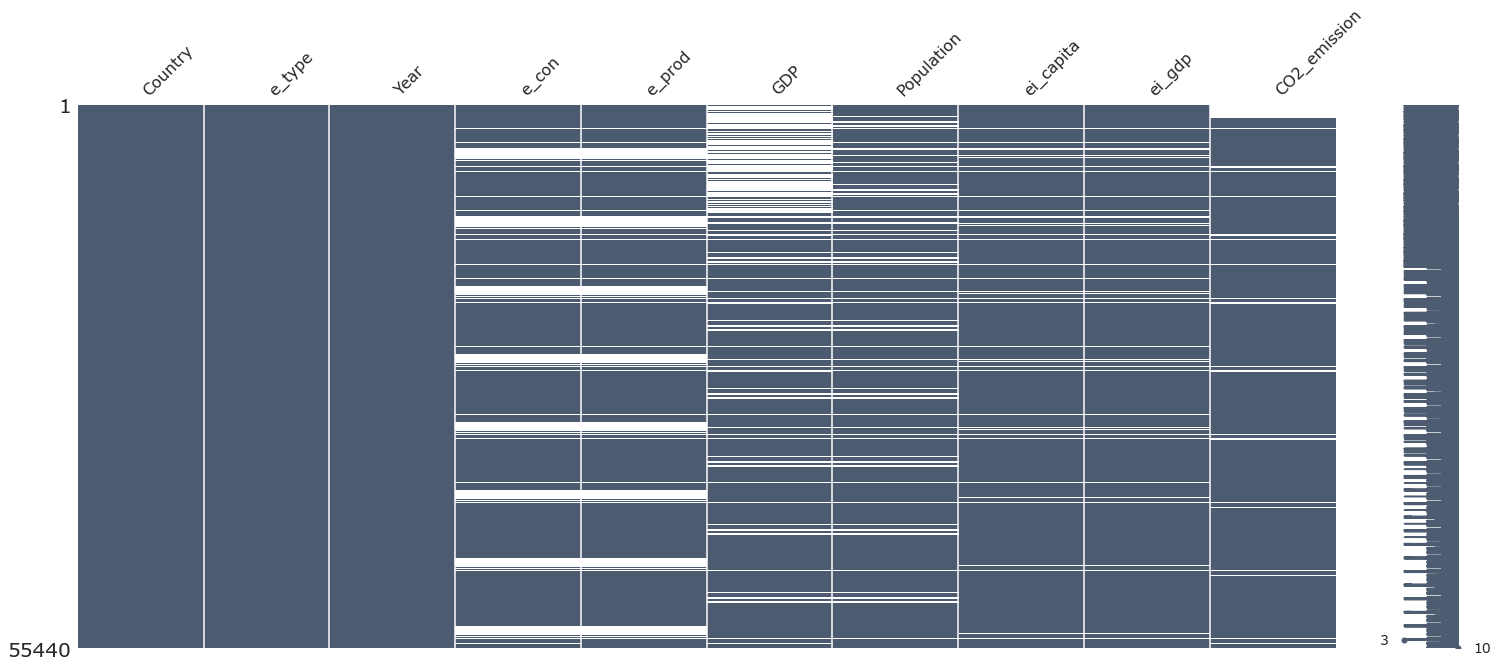

In [14]:
#Missing data as white lines 
import missingno as msno
msno.matrix(df,color=(0.3,0.36,0.44))

In [15]:
# Function ill be using to drop selected coutries
def to_drop(list):
    for country in list:
        value = df[df['Country']==country].index
        df.drop(labels=value, axis=0, inplace=True)

**Taking care of countries that no longer exist or formed within the time period**

Quite a bit of the Countries/Territories in this dataset no longer exist or have become another country, leaving only NaN values for the years they didnt exist. Im going to drop all the rows of these years. Below are some examples of some of these countries.

In [16]:
df[df['Country']=='Former U.S.S.R.']

Country   e_type  Year      e_con     e_prod  GDP  Population  \
426    Former U.S.S.R.      all  1980  51.569984  61.506642  NaN         NaN   
427    Former U.S.S.R.     coal  1980  15.909849  17.152565  NaN         NaN   
428    Former U.S.S.R.  nat_gas  1980  13.861120  15.984800  NaN         NaN   
429    Former U.S.S.R.  pet/oth  1980  19.117843  25.624987  NaN         NaN   
430    Former U.S.S.R.  nuclear  1980   0.832639   0.832639  NaN         NaN   
...                ...      ...   ...        ...        ...  ...         ...   
54481  Former U.S.S.R.     coal  2019        NaN        NaN  NaN         NaN   
54482  Former U.S.S.R.  nat_gas  2019        NaN        NaN  NaN         NaN   
54483  Former U.S.S.R.  pet/oth  2019        NaN        NaN  NaN         NaN   
54484  Former U.S.S.R.  nuclear  2019        NaN        NaN  NaN         NaN   
54485  Former U.S.S.R.  ren/oth  2019        NaN        NaN  NaN         NaN   

       ei_capita  ei_gdp  CO2_emission  
426          0.0     0.0           NaN  
427          0.0     0.0           NaN  
428          0.0     0.0           NaN  
429          0.0     0.0           NaN  
430          0.0     0.0           0.0  
...          ...     ...           ...  
54481        NaN     NaN           NaN  
54482        NaN     NaN           NaN  
54483        NaN     NaN           NaN  
54484        NaN     NaN           0.0  
54485        NaN     NaN           0.0  

[240 rows x 10 columns]

In [17]:
df[df['Country']=='South Sudan']

Country   e_type  Year     e_con    e_prod      GDP  Population  \
1146   South Sudan      all  1980       NaN       NaN      NaN         NaN   
1147   South Sudan     coal  1980       NaN       NaN      NaN         NaN   
1148   South Sudan  nat_gas  1980       NaN       NaN      NaN         NaN   
1149   South Sudan  pet/oth  1980       NaN       NaN      NaN         NaN   
1150   South Sudan  nuclear  1980       NaN       NaN      NaN         NaN   
...            ...      ...   ...       ...       ...      ...         ...   
55201  South Sudan     coal  2019  0.000000  0.000000  17.3349     11062.1   
55202  South Sudan  nat_gas  2019  0.000000  0.000000  17.3349     11062.1   
55203  South Sudan  pet/oth  2019  0.026558  0.291543  17.3349     11062.1   
55204  South Sudan  nuclear  2019       NaN       NaN  17.3349     11062.1   
55205  South Sudan  ren/oth  2019  0.000036  0.000036  17.3349     11062.1   

       ei_capita    ei_gdp  CO2_emission  
1146         NaN       NaN           NaN  
1147         NaN       NaN           NaN  
1148         NaN       NaN           NaN  
1149         NaN       NaN           NaN  
1150         NaN       NaN      0.000000  
...          ...       ...           ...  
55201   2.404033  1.534111      0.000000  
55202   2.404033  1.534111      0.000000  
55203   2.404033  1.534111      1.675889  
55204   2.404033  1.534111      0.000000  
55205   2.404033  1.534111      0.000000  

[240 rows x 10 columns]

For all the years that each of the countries didnt exist, a set of NaN values remain for its columns. Luckily, theres a tool we can use to simply drop all rows with a certain amount of NaN values in them, which is dropna(). Im going to drop all the rows of the countries with more than 3 values set to NaN as this will take care of the years these countries didnt exist as well as rows that have to little information.

In [18]:
# Using a threshold of 7, which means all rows that have less than 7 non NaN values will be dropped
df.dropna(thresh=7, axis=0, inplace=True)

In [19]:
df[df['Country']=='Former U.S.S.R.']

Country   e_type  Year      e_con     e_prod  GDP  Population  \
426    Former U.S.S.R.      all  1980  51.569984  61.506642  NaN         NaN   
427    Former U.S.S.R.     coal  1980  15.909849  17.152565  NaN         NaN   
428    Former U.S.S.R.  nat_gas  1980  13.861120  15.984800  NaN         NaN   
429    Former U.S.S.R.  pet/oth  1980  19.117843  25.624987  NaN         NaN   
430    Former U.S.S.R.  nuclear  1980   0.832639   0.832639  NaN         NaN   
...                ...      ...   ...        ...        ...  ...         ...   
15673  Former U.S.S.R.     coal  1991  14.561299  15.248816  NaN         NaN   
15674  Former U.S.S.R.  nat_gas  1991  25.314168  28.966476  NaN         NaN   
15675  Former U.S.S.R.  pet/oth  1991  17.388062  22.081015  NaN         NaN   
15676  Former U.S.S.R.  nuclear  1991   2.310946   2.310946  NaN         NaN   
15677  Former U.S.S.R.  ren/oth  1991   2.427003   2.428238  NaN         NaN   

       ei_capita  ei_gdp  CO2_emission  
426          0.0     0.0           NaN  
427          0.0     0.0           NaN  
428          0.0     0.0           NaN  
429          0.0     0.0           NaN  
430          0.0     0.0      0.000000  
...          ...     ...           ...  
15673        0.0     0.0   1443.073463  
15674        0.0     0.0   1358.780491  
15675        0.0     0.0   1222.000000  
15676        0.0     0.0      0.000000  
15677        0.0     0.0      0.000000  

[72 rows x 10 columns]

Perfect, all the countries that were newly created or had fallen in the timezone of the dataset are all taken care of

**C02_emission column**

In [20]:
# Number of values for each year
temp_co2 = df[df['Year']<=1985]
temp_co2.groupby('Year')['CO2_emission'].count()

Year
1980     378
1981    1155
1982    1156
1983    1156
1984    1155
1985    1155
Name: CO2_emission, dtype: int64

The year 1980 has only a few C02_emission values, im just going to remove this year for simplicity

In [21]:
df = df[df['Year']>1980]

Also removing all values that have C02_emission as NaN, as these values will be useless in this analysis

In [22]:
df.dropna(subset=['CO2_emission'], inplace=True)

**e_con and e_prod columns**

A lot of values from e_con and e_prod are missing due to the fact that most countries dont consume or produce Nuclear energy, so they leave them as Nan. Im going to add 0 in place of these

In [23]:
# Splitting e_type nuclear from rest of dataset
nuclear = df[df['e_type']=='nuclear']
    
# Keeping the remaining of the main dataset
temp_ecp = df[df['e_type']!='nuclear']

# Replacing all Nan values of e_con and e_prod of e_type nuclear to 0
nuclear[['e_con', 'e_prod']] = nuclear[['e_con', 'e_prod']].replace(np.nan, 0)

# Joining them back up
df = pd.concat([nuclear, temp_ecp]).sort_index()

**GDP column**

Keep in mind that each country has 234 values within the dataset, one for each of the 6 energy types, each year. So any countries with more than 100 missing GDP values will be problametic. I will be dropping all these countries for this reason.

In [24]:
temp_gdp = pd.DataFrame(df['GDP'].isnull().groupby(df['Country']).sum()).reset_index()
# Countries with more than 90 missing GDP values
temp_gdp = temp_gdp[temp_gdp['GDP']>=90]

temp_gdp

Country  GDP
3               American Samoa  132
5                   Antarctica  195
45                Cook Islands  195
64            Falkland Islands  195
65               Faroe Islands  182
73               French Guiana  195
74            French Polynesia  195
82                   Gibraltar  195
87                        Guam  132
133                 Micronesia  159
137                 Montserrat  195
141                      Nauru  195
145              New Caledonia  195
150                       Niue  195
171               Saint Helena  194
174  Saint Pierre and Miquelon  195
210   Turks and Caicos Islands  174
211                     Tuvalu  156
212       U.S. Pacific Islands  195
213           U.S. Territories  156
225                Wake Island  195
226             Western Sahara  195

In [25]:
# Making List of all these countries
m_gdp = [country for country in temp_gdp['Country']]

# Dropping all the countries on the list from the main dataset (Function used is the one above)
to_drop(m_gdp)

Looking further into the the values of GDP from the years 1980 to 1987

In [26]:
temp_gdp = df[df['Year']<=1990]
temp_gdp.groupby('Year')['e_con', 'e_prod', 'GDP', 'Population', 'ei_capita', 'ei_gdp', 'CO2_emission'].count()

e_con  e_prod   GDP  Population  ei_capita  ei_gdp  CO2_emission
Year                                                                  
1981   1049    1049   310         994       1025    1025          1049
1982   1049    1049   310         994       1025    1025          1049
1983   1049    1049   310         994       1025    1025          1049
1984   1048    1048   310         982       1024    1024          1048
1985   1048    1048   310         982       1024    1024          1048
1986   1050    1050   310         984       1026    1026          1050
1987   1049    1049   310         988       1025    1025          1049
1988   1053    1053   972        1012       1029    1029          1053
1989   1054    1054   978        1018       1030    1030          1054
1990   1056    1056  1004        1020       1032    1032          1056

Youll notice in the GDP column from 1980 to 1987 not many countries gave this information, which means theres a lot of NaN values, this is a problem of course.

In [27]:
# Looking further into the GDP data before 1988
temp_gdp = df[df['Year']<=1987]
temp_gdp = pd.DataFrame(temp_gdp['GDP'].isnull().groupby(temp_gdp['Country']).sum()).reset_index()

# Countries with more than 30 missing GDP values
temp_gdp = temp_gdp[temp_gdp['GDP']>30]
temp_gdp.head(200)

Country  GDP
0            Afghanistan   42
1                Albania   42
2                Algeria   42
3                 Angola   42
4    Antigua and Barbuda   35
..                   ...  ...
171              Vanuatu   42
173              Vietnam   42
175                Yemen   42
176               Zambia   42
177             Zimbabwe   42

[123 rows x 2 columns]

Having 42 missing GDP values like the countries above means that all GDP values from the time period of 1980-1987 are NaN. This implys close to half the countries in this dataset have no GDP data in this timeperiod! This is not good of course as this is an important column for this analysis, so Ill be removing everything up to 1988.

In [28]:
#Removing everything up to 1988
df = df[df['Year']>=1988]

**Population column**

In [29]:
temp_pop = pd.DataFrame(df['Population'].isnull().groupby(df['Country']).sum()).reset_index()
# Countries with more than 100 missing Population values
temp_pop = temp_pop[temp_pop['Population']>=100]

temp_pop

Empty DataFrame
Columns: [Country, Population]
Index: []

Dont seem to be any Population values over 100 in the dataset anymore, I assume I already dealt with them when I removed all the countries with a high missing value counts for the GDP values.

The only countries with missing population data seem to be former countries, including the USSR, West and East Germany, Former Yugoslavia etc, mostly former easter block countries. Im going to drop all these countries for simplicity.

In [30]:
temp_pop = pd.DataFrame(df[df['Population'].isnull()])
cont = temp_pop['Country'].unique()

print(cont)

to_drop(cont)

['Former Czechoslovakia' 'Former U.S.S.R.' 'Former Yugoslavia'
 'Germany, East' 'Germany, West' 'Hungary' 'Poland'
 'Former Serbia and Montenegro']


**ei_capita and ei_gdp columns**

In [31]:
# ei_capita
temp_ei_capita = pd.DataFrame(df['ei_capita'].isnull().groupby(df['Country']).sum()).reset_index()
# Countries with missing ei_capita values
temp_ei_capita = temp_ei_capita[temp_ei_capita['ei_capita']>0]


# ei_gdp
temp_ei_gdp = pd.DataFrame(df['ei_gdp'].isnull().groupby(df['Country']).sum()).reset_index()
# Countries with missing ei_gdp values
temp_ei_gdp = temp_ei_gdp[temp_ei_gdp['ei_gdp']>0]


print(temp_ei_capita, '\n')
print(temp_ei_gdp)

                  Country  ei_capita
70              Greenland        155
80                Iceland        160
124  Netherlands Antilles        160
181   Trinidad and Tobago        160
185   U.S. Virgin Islands        160 

                  Country  ei_gdp
70              Greenland     155
80                Iceland     160
124  Netherlands Antilles     160
181   Trinidad and Tobago     160
185   U.S. Virgin Islands     160


Its the same countries that are missing these values, and they all have a relatively small population of around 1 million or less as well, so for simplicity im going to remove them as they probably wont be of much importance compared to the rest of the countries

In [32]:
# Making List of all these countries
m_ei_capita = [country for country in temp_ei_capita['Country']]
m_ei_gdp = [country for country in temp_ei_gdp['Country']]

# Dropping all the countries on the list from the main dataset
to_drop(m_ei_capita)
to_drop(m_ei_gdp)

**Taking care of all other missing data using KNN imputation**

What missing data is left...

In [33]:
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 0
e_prod: 0
GDP: 189
Population: 0
ei_capita: 0
ei_gdp: 0
CO2_emission: 0


Perfect, a lot of the missing data has been taken care of, most of it being the data not missing at random (MNAR), I can now just use KNN imputation to take care of the rest.

In [34]:
from sklearn.impute import KNNImputer

# One hot encoding the categorical variables for now
cat_vars = df[['Country', 'e_type', 'Year']]
cat_dummies = pd.get_dummies(cat_vars, drop_first=True)


# Creating Temporary dataset
temp_m = df.drop(['Country', 'e_type', 'Year'], axis=1)
temp_m = pd.concat([cat_dummies, temp_m], axis=1)

# KNN Imputer
imputer = KNNImputer(
    n_neighbors=5, # the number of neighbours K
    weights='distance', # the weighting factor
    metric='nan_euclidean', # the metric to find the neighbours
    add_indicator=False, # whether to add a missing indicator
)

# Attaching the Imputer to dataset
temp_m = imputer.fit_transform(temp_m)
temp_m = pd.DataFrame(temp_m)

temp_m.head()

0    1    2    3    4    5    6    7    8    9    ...  227  228  229  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

          230         231           232           233        234       235  \
0  345.560876  347.412863  42106.595403  4.927545e+06  70.128405  8.206811   
1   96.873178   98.484482  42106.595403  4.927545e+06  70.128405  8.206811   
2   71.010048   71.852938  42106.595403  4.927545e+06  70.128405  8.206811   
3  133.445814  132.485303  42106.595403  4.927545e+06  70.128405  8.206811   
4   19.226897   19.226897  42106.595403  4.927545e+06  70.128405  8.206811   

            236  
0  21163.840556  
1   8930.924825  
2   3571.676242  
3   8661.239490  
4      0.000000  

[5 rows x 237 columns]

Now i just need to join these new values back into the original dataset

In [35]:
# Removing the encoded data from the temp_data dataset
cut_data = temp_m.iloc[:,230:]

# Removing the section of data im going to replace from the original dataset df
columns = df.columns
original_data = df.iloc[:,:3].reset_index(drop=True)

# Merging the two
#temp = pd.concat([original_data, temp_data], axis=1).drop('index', 1).set_axis(columns, axis=1, inplace=False)
df = pd.concat([original_data, cut_data], axis=1).reset_index(drop=True).set_axis(columns, axis=1, inplace=False)

In [36]:
df.head(10)

Country   e_type  Year       e_con      e_prod           GDP  \
0        World      all  1988  345.560876  347.412863  42106.595403   
1        World     coal  1988   96.873178   98.484482  42106.595403   
2        World  nat_gas  1988   71.010048   71.852938  42106.595403   
3        World  pet/oth  1988  133.445814  132.485303  42106.595403   
4        World  nuclear  1988   19.226897   19.226897  42106.595403   
5        World  ren/oth  1988   24.927484   25.363243  42106.595403   
6  Afghanistan      all  1988    0.111221    0.121394     37.701300   
7  Afghanistan     coal  1988    0.002875    0.002731     37.701300   
8  Afghanistan  nat_gas  1988    0.073290    0.110982     37.701300   
9  Afghanistan  pet/oth  1988    0.027375    0.000000     37.701300   

     Population  ei_capita    ei_gdp  CO2_emission  
0  4.927545e+06  70.128405  8.206811  21163.840556  
1  4.927545e+06  70.128405  8.206811   8930.924825  
2  4.927545e+06  70.128405  8.206811   3571.676242  
3  4.927545e+06  70.128405  8.206811   8661.239490  
4  4.927545e+06  70.128405  8.206811      0.000000  
5  4.927545e+06  70.128405  8.206811      0.000000  
6  1.161800e+04   9.573144  2.950052      3.646724  
7  1.161800e+04   9.573144  2.950052      0.324617  
8  1.161800e+04   9.573144  2.950052      1.222107  
9  1.161800e+04   9.573144  2.950052      2.100000

In [37]:
for var in df:
    print(f'{var}: {df[var].isnull().sum()}')

Country: 0
e_type: 0
Year: 0
e_con: 0
e_prod: 0
GDP: 0
Population: 0
ei_capita: 0
ei_gdp: 0
CO2_emission: 0


<AxesSubplot:>

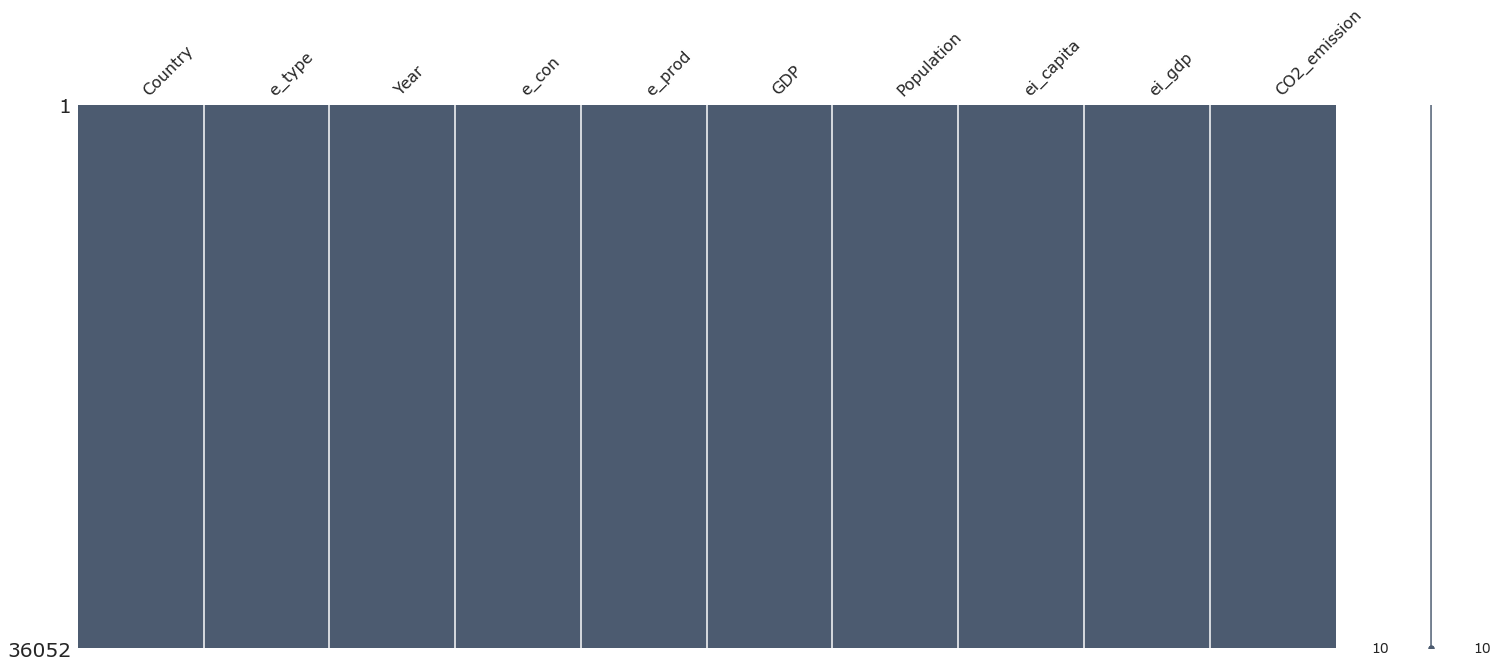

In [38]:
msno.matrix(df,color=(0.3,0.36,0.44))

Perfect, all the missing data is taken care of!

### Rounding Float Values

The float values in this dataset have way to much decimal points, im going to reduce them to 2 for simpler readability

In [39]:
for var in df:
    if df[var].dtype == 'float':
        df[var] = df[var].round(2)

### Final Look at the Dataset

In [40]:
df.head()

Country   e_type  Year   e_con  e_prod      GDP  Population  ei_capita  \
0   World      all  1988  345.56  347.41  42106.6  4927545.08      70.13   
1   World     coal  1988   96.87   98.48  42106.6  4927545.08      70.13   
2   World  nat_gas  1988   71.01   71.85  42106.6  4927545.08      70.13   
3   World  pet/oth  1988  133.45  132.49  42106.6  4927545.08      70.13   
4   World  nuclear  1988   19.23   19.23  42106.6  4927545.08      70.13   

   ei_gdp  CO2_emission  
0    8.21      21163.84  
1    8.21       8930.92  
2    8.21       3571.68  
3    8.21       8661.24  
4    8.21          0.00

In [41]:
df.shape

(36052, 10)

Weve gotten rid of 19,388 rows of data, thats a lot! Its okay though, theres still plenty of data to finish the analysis

<a id=2></a>

# Deeper look into the data were working with

****

Now that weve taken care of the cleaning process, we can now start looking into the data

**Target Distribution**

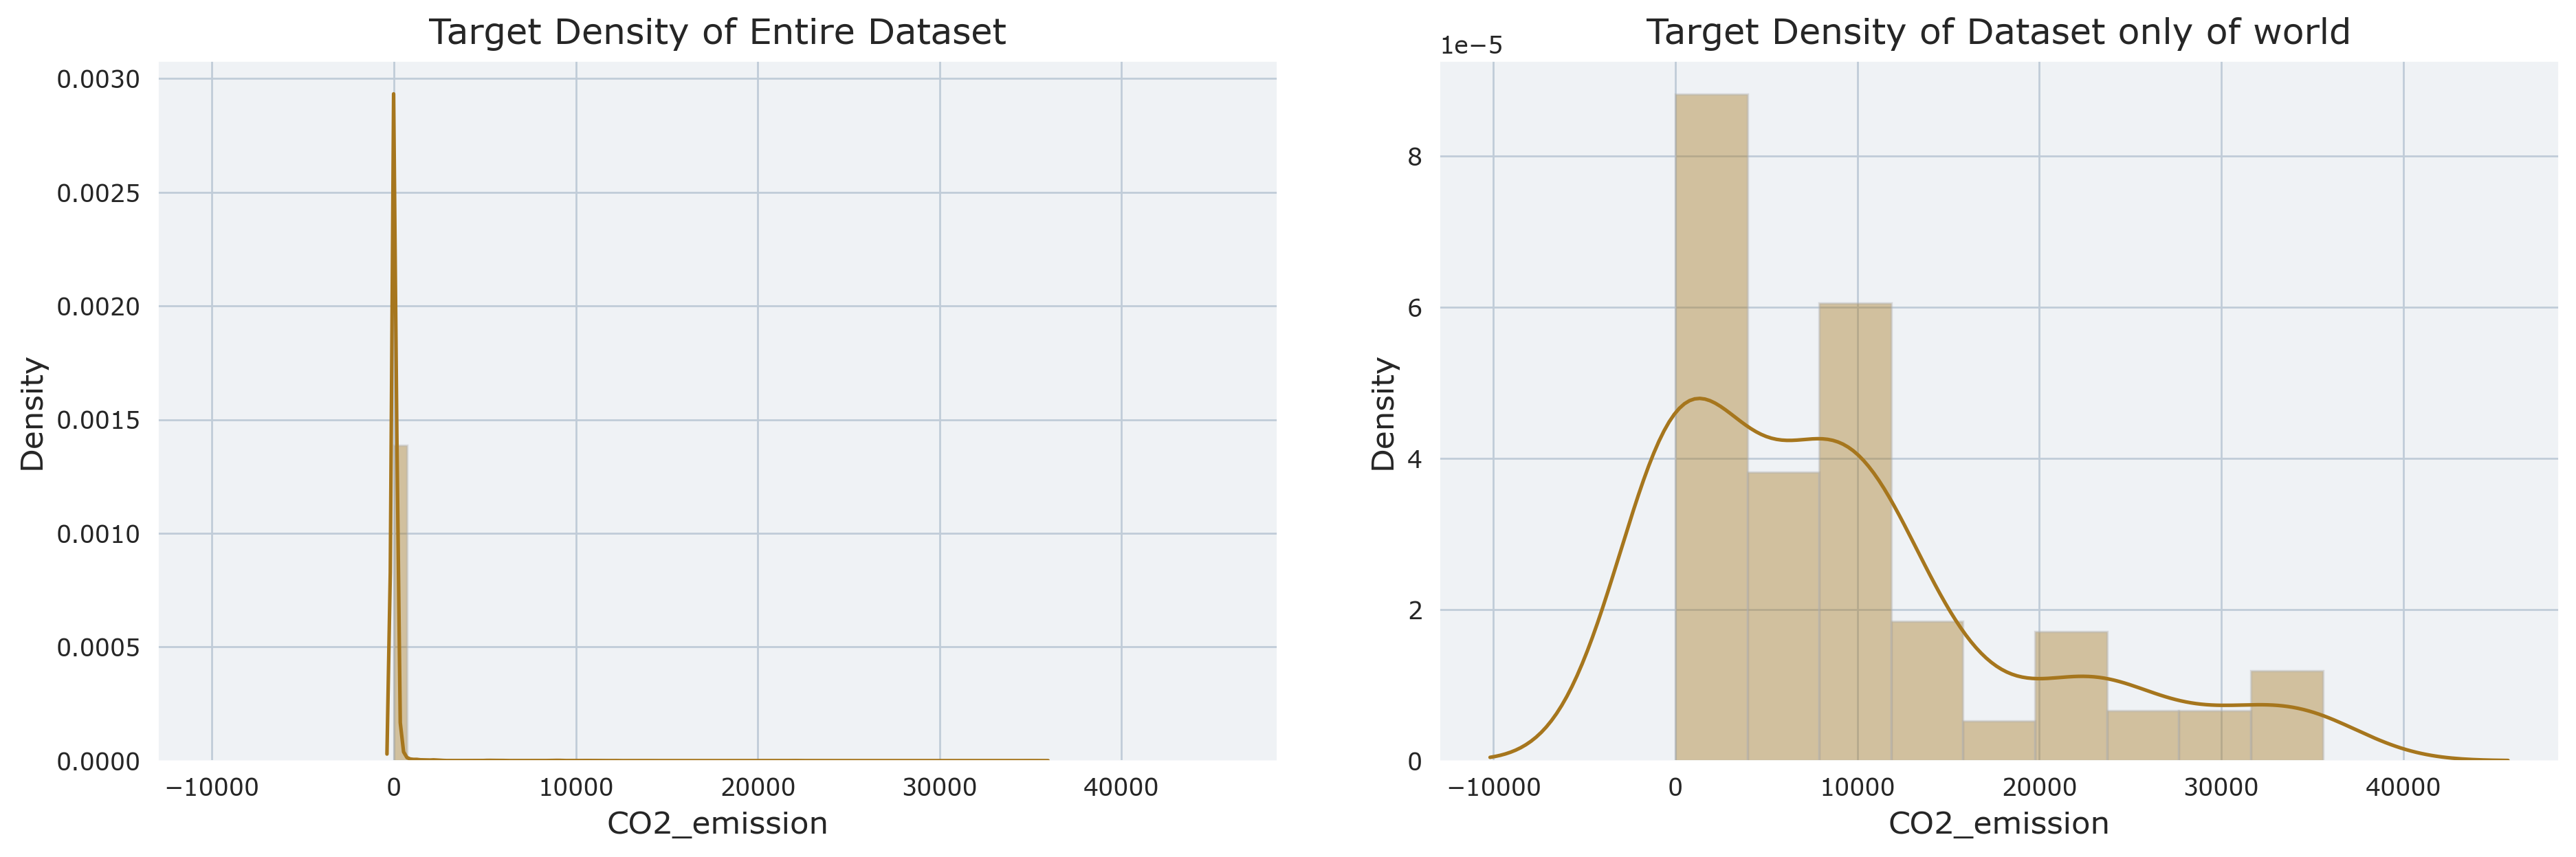

In [42]:
with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 13,
                          'xtick.labelsize': 10, 'ytick.labelsize': 10,
                          'legend.title_fontsize': 7, 'axes.titlesize': 15,
                          'axes.titlepad': 7}):


    fig, ax = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    
    # Entire dataset
    sns.distplot(df['CO2_emission'], ax=ax[0]).set_title('Target Density of Entire Dataset')
    
    # Dataset only of world
    world = df[df['Country']=='World']
    sns.distplot(world['CO2_emission'], ax=ax[1]).set_title('Target Density of Dataset only of world')
    

    plt.tight_layout(pad=0.4, w_pad=2, h_pad=2)
    plt.show()

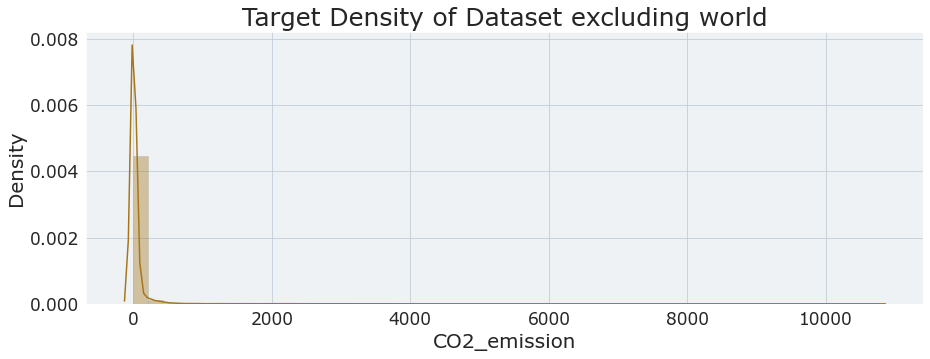

In [43]:
not_world = df[df['Country']!='World']

plt.figure(figsize=(15, 5))
sns.distplot(not_world['CO2_emission']).set_title('Target Density of Dataset excluding world')
plt.show()

The distribution is highly right skewed.

**Distribution of energy types**

In [44]:
temp_dist = df.groupby('e_type').count()['CO2_emission'].reset_index().sort_values(by='CO2_emission',ascending=False)
temp_dist.style.background_gradient(cmap='winter')

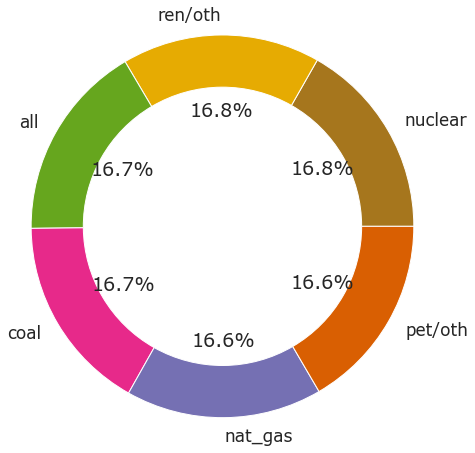

In [45]:
percent = temp_dist['CO2_emission']
labels= temp_dist['e_type']

my_pie,_,_ = plt.pie(percent, radius = 2.2, labels=labels, autopct="%.1f%%")
plt.setp(my_pie, width=0.6, edgecolor='white') 
plt.show()

All energy types pretty much equally distributed

**Correlations**

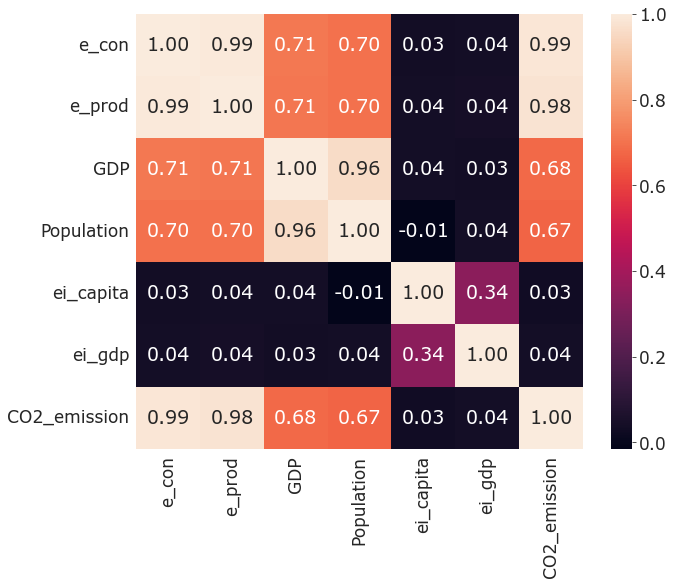

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.iloc[:,3:].corr(), annot=True, fmt='.2f')
plt.show()

**Pair Plot**

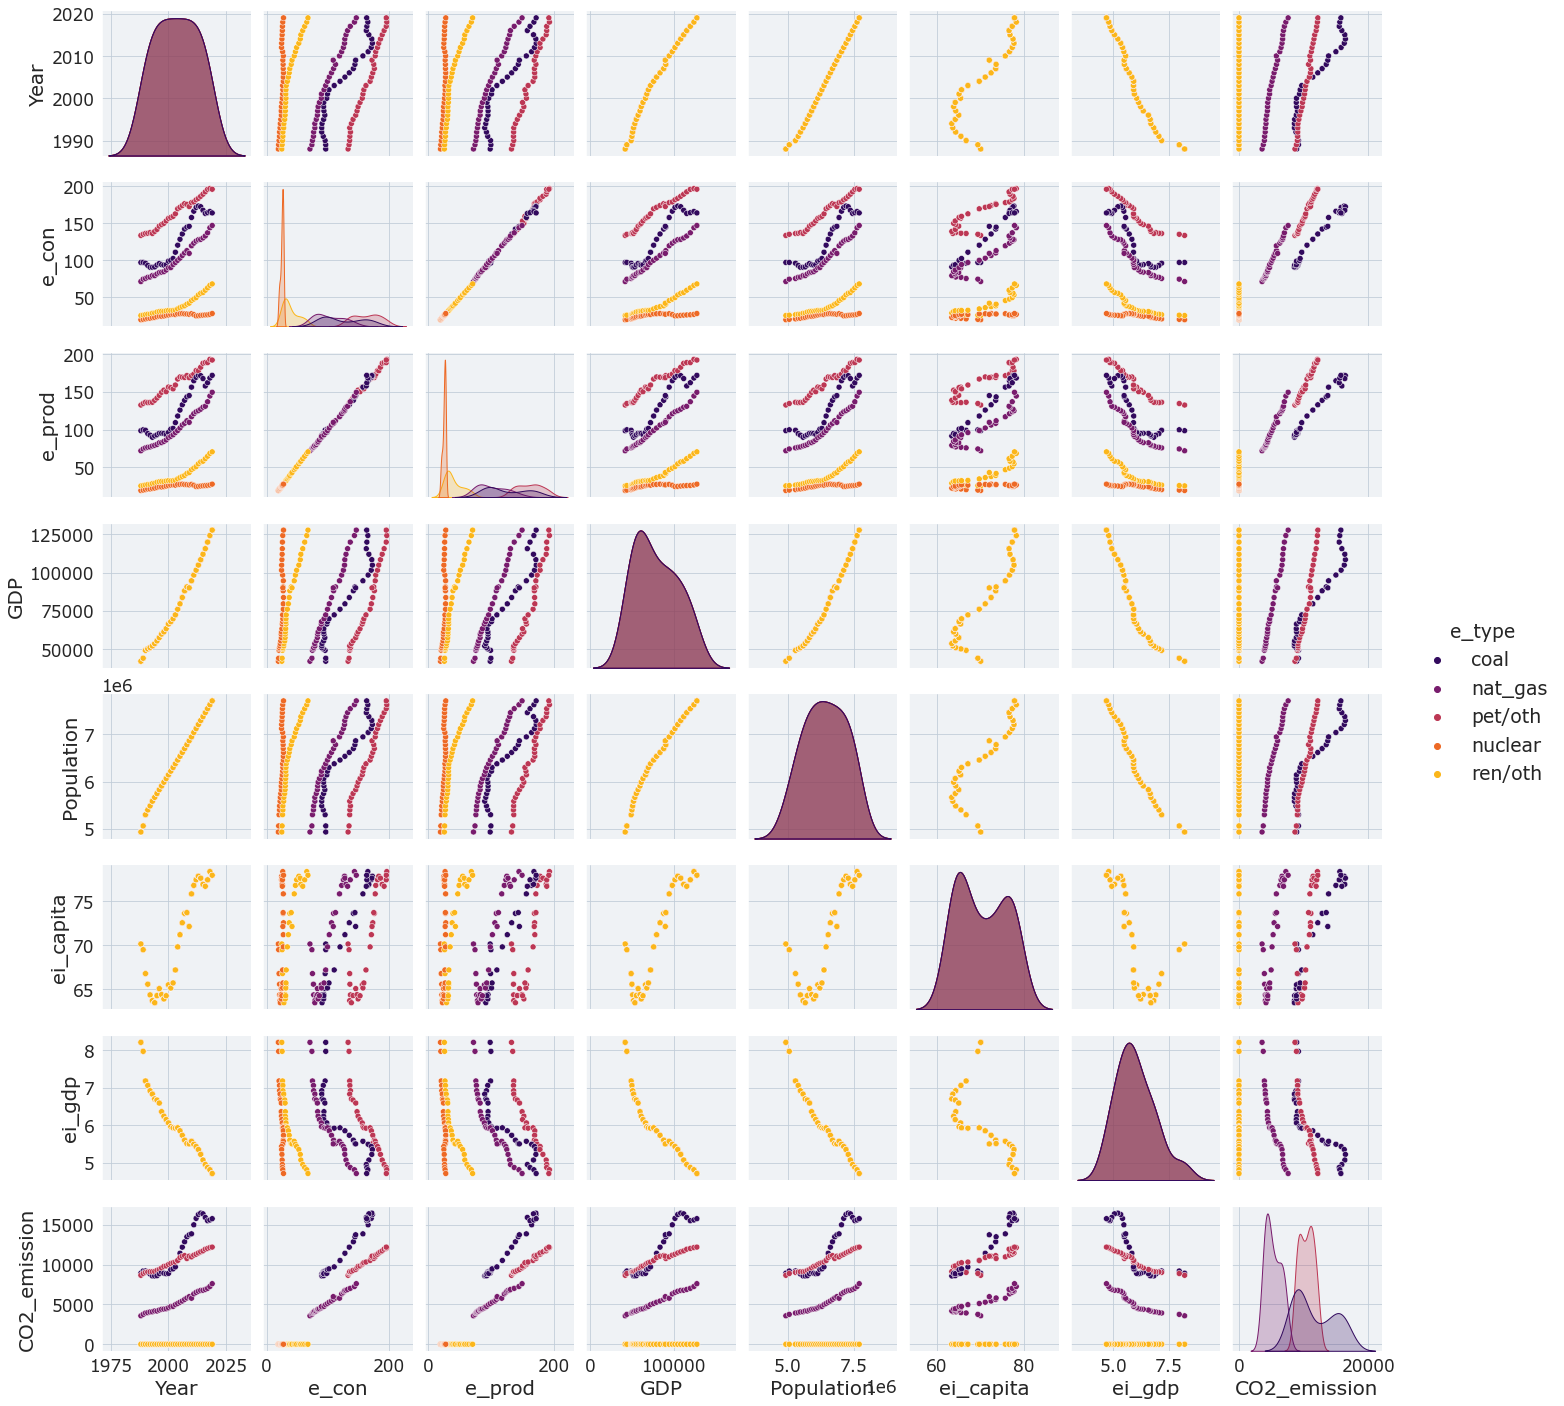

In [47]:
temp_pp = df[df['Country']=='World'][df['e_type']!='all']

sns.pairplot(temp_pp, hue='e_type',palette="inferno")
plt.show()

<a id=3></a>

# Analysis

****

**Quick overview of Consumption Globally**

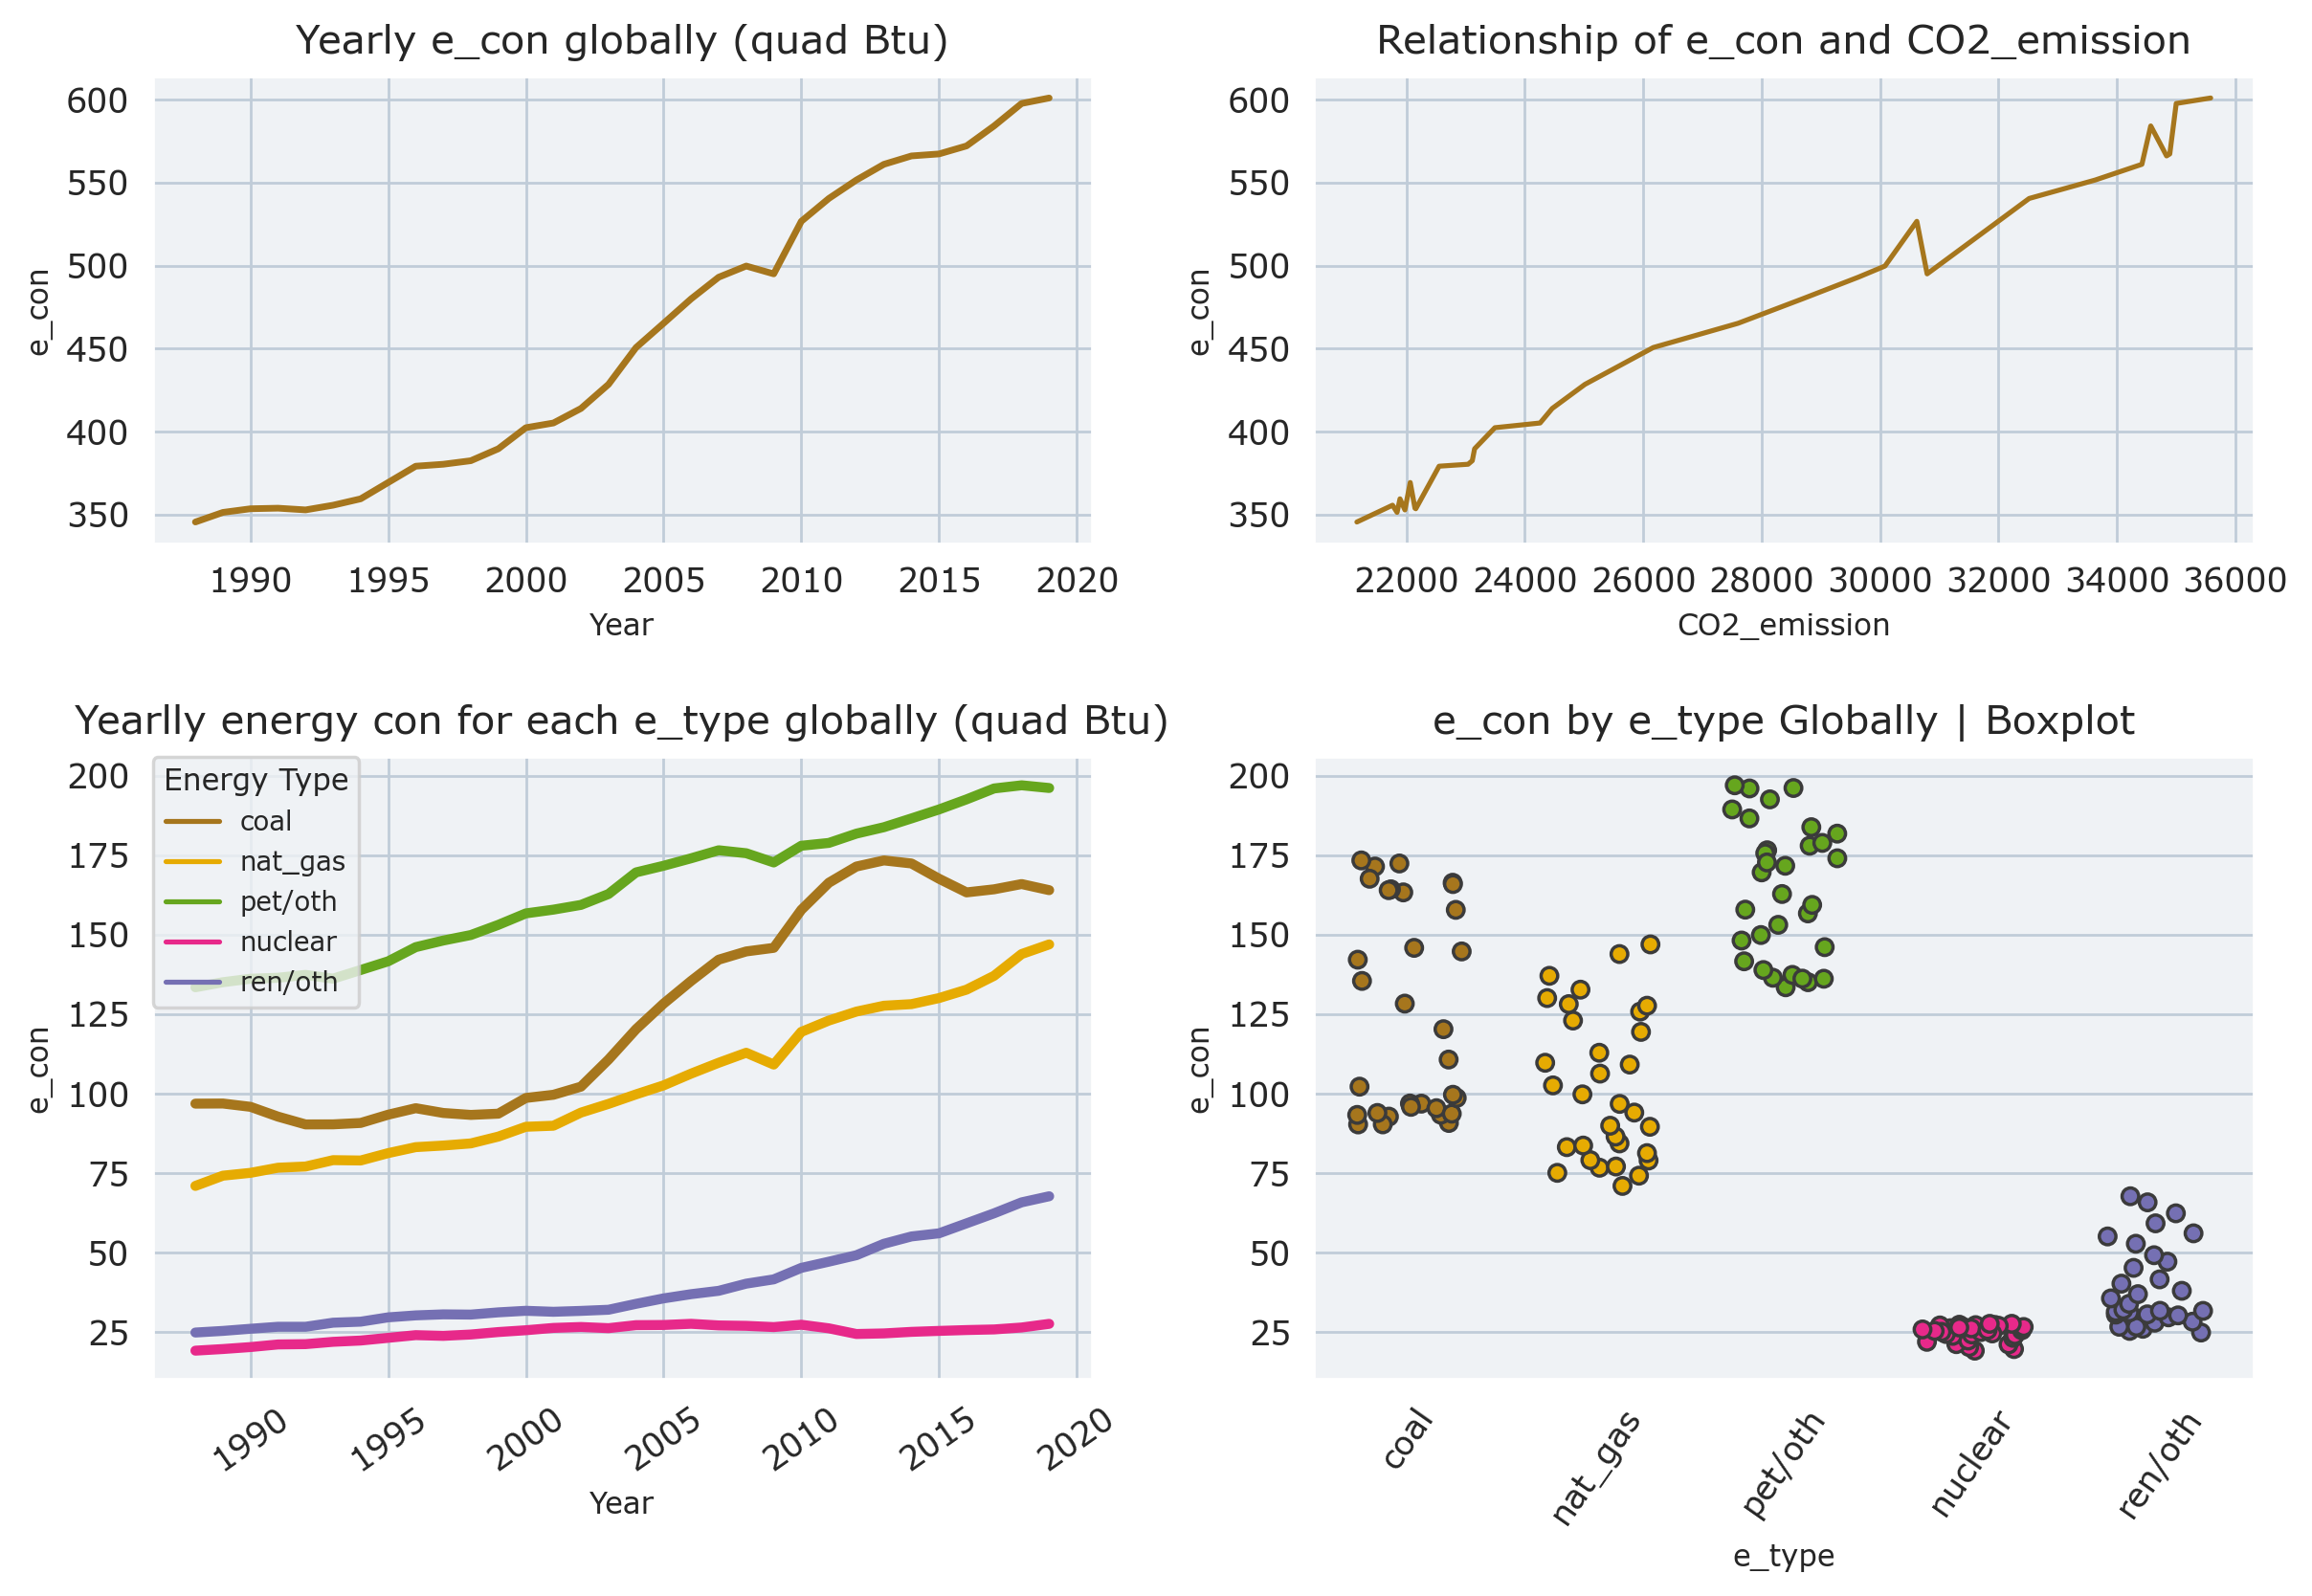

In [48]:
with plt.rc_context(rc = {'figure.dpi': 250, 'axes.labelsize': 9,
                          'xtick.labelsize': 10, 'ytick.labelsize': 10,
                          'legend.title_fontsize': 7, 'axes.titlesize': 12,
                          'axes.titlepad': 7}):

    # Specifying all countries == world
    con = df[df['Country']=='World']
    
    
    fig_4, ax_4 = plt.subplots(2, 2, figsize = (10, 7), # constrained_layout = True,
                               gridspec_kw = {'width_ratios': [3, 3], 
                                                'height_ratios': [3, 4]})

    ax_flat = ax_4.flatten()

    
    ### 1st graph
    sns.lineplot(ax=ax_flat[0], data=con[con['e_type']=='all'],
             x='Year', y='e_con', lw=2
            ).set_title('Yearly e_con globally (quad Btu)')

    
    ### 2nd graph
    sns.lineplot(ax=ax_flat[1], data=con[con['e_type']=='all'],
                x='CO2_emission', y='e_con'
               ).set_title('Relationship of e_con and CO2_emission')
    

    ### 3rd graph

    sns.lineplot(ax=ax_flat[2], data=con[con['e_type']!='all'],
            x='Year',
            y='e_con',
            hue='e_type',
            lw=3,
            ).set_title('Yearlly energy con for each e_type globally (quad Btu)')
    
    
    ax_flat[2].legend(fontsize=8, title='Energy Type', title_fontsize=9, loc='upper left', borderaxespad=0)
    ax_flat[2].tick_params(axis='x', rotation=35)

    
    
    
    ### 4th graph
    sns.stripplot(ax=ax_flat[3], data=con[con['e_type']!='all'],
                x='e_type', y='e_con', jitter=.3, linewidth=1
               ).set_title('e_con by e_type Globally | Boxplot')

    ax_flat[3].tick_params(axis='x', rotation=55)
    
    plt.tight_layout(pad = 1)
    plt.show()

**Percentage rate increase/decrease**

In [49]:
# Specifying all countries == world, and e_type == all
con0 = df[df['Country']=='World'][df['e_type']=='all'][['Year', 'e_con']].reset_index(drop=True)

years = con0['Year'].unique()

# For yearlly percentage change
temp_con0 = con0
temp_con0['pct_change'] = temp_con0['e_con'].pct_change() * 100

# For overall percentage change
start = con0.loc[con0['Year']==1988] 
end = con0.loc[con0['Year']==2019]
temp_con02 = pd.concat([start, end]).reset_index(drop=True)
    
temp_con02['pct_change'] = temp_con02['e_con'].pct_change() * 100

# Plotting figure
fig = px.area(temp_con0, x='Year', y='pct_change', title='Yearlly percent change of energy consumption')
fig.show()

print(f'The average yearly percentage change is {round(temp_con0["pct_change"].mean(), 2)}%,\n and the overall percentage change from 1988 to 2019 is {round(temp_con02["pct_change"].sum(), 2)}%')

The average yearly percentage change is 1.81%,
 and the overall percentage change from 1988 to 2019 is 73.93%


Global energy consumption has been on average increasing by 1.81% a year, and overall from 1988 to 2019 has increased by 73.93%. Another thing to mention is that the only sharp decrease in energy consumption was in 2009, a year after the financial crisis.

In [50]:
# Specifying all countries == world, and e_type == all
con0 = df[df['Country']=='World'][df['e_type']!='all'][['Year','Country', 'e_type', 'e_con']].reset_index(drop=True)

# coal
coal = con0
coal['pct_change'] = con0[con0['e_type']=='coal']['e_con'].pct_change() * 100
coal = coal[coal['pct_change'].notna()]

# nat_gas
nat_gas = con0
nat_gas['pct_change'] = con0[con0['e_type']=='nat_gas']['e_con'].pct_change() * 100
nat_gas = nat_gas[nat_gas['pct_change'].notna()]

# pet/oth
pet_oth = con0
pet_oth['pct_change'] = con0[con0['e_type']=='pet/oth']['e_con'].pct_change() * 100
pet_oth = pet_oth[pet_oth['pct_change'].notna()]

# nuclear
nuclear = con0
nuclear['pct_change'] = con0[con0['e_type']=='nuclear']['e_con'].pct_change() * 100
nuclear = nuclear[nuclear['pct_change'].notna()]

# ren/oth
ren_oth = con0
ren_oth['pct_change'] = con0[con0['e_type']=='ren/oth']['e_con'].pct_change() * 100
ren_oth = ren_oth[ren_oth['pct_change'].notna()]

# Rejoining all the datasets back together
final_df = pd.concat([coal, nat_gas, pet_oth, nuclear, ren_oth], axis=0)

fig = px.area(final_df, x='Year', y='pct_change', facet_col='e_type', color='e_type', facet_col_wrap=2, 
             title='Yearlly percentage rate increase/decrease of the consumption of each energy type')
fig.show()

**Top Consumers**

In [51]:
# Specifying all countreis != world, as well as all energy types
con1 = df[df['Country']!='World'][df['e_type']=='all']

list_con = []

# Sum of all yearly conumption for all energy types
for country in con1['Country'].unique():
    total_con = con1[con1['Country']==country]['e_con'].sum(axis=0)
    list_con.extend([[country, total_con]])

# Temporary dataset of all the Countries and there respective total Consumption over the time period
top_con = pd.DataFrame(list_con, columns=['Country', 'Total_con']).sort_values(by='Total_con',ascending=False)

# Plotting the top 20 Consumers
fig = px.bar(top_con.head(20), x='Country', y='Total_con', title='Top 20 Energy Consumers over the time period (quad Btu)')
fig.show()

**Choropleth**

In [52]:
con2 = df[df['Country']!='World'][df['e_type']=='all']

temp_con2 = con2[['Country', 'Year', 'e_con']].groupby(['Country','Year']).sum().reset_index()

px.choropleth(data_frame=temp_con2, locations="Country", locationmode='country names', animation_frame="Year",
              color='e_con', title="Energy Consumption of each country from 1988 to 2019 (quad Btu)")

Its quite obvious to tell that China and The United States are the largest energy consumers worldwide throughout this time period, this makes sense as they are the two largest economies in the world.

**What energy types do the top 4 consumers use?**

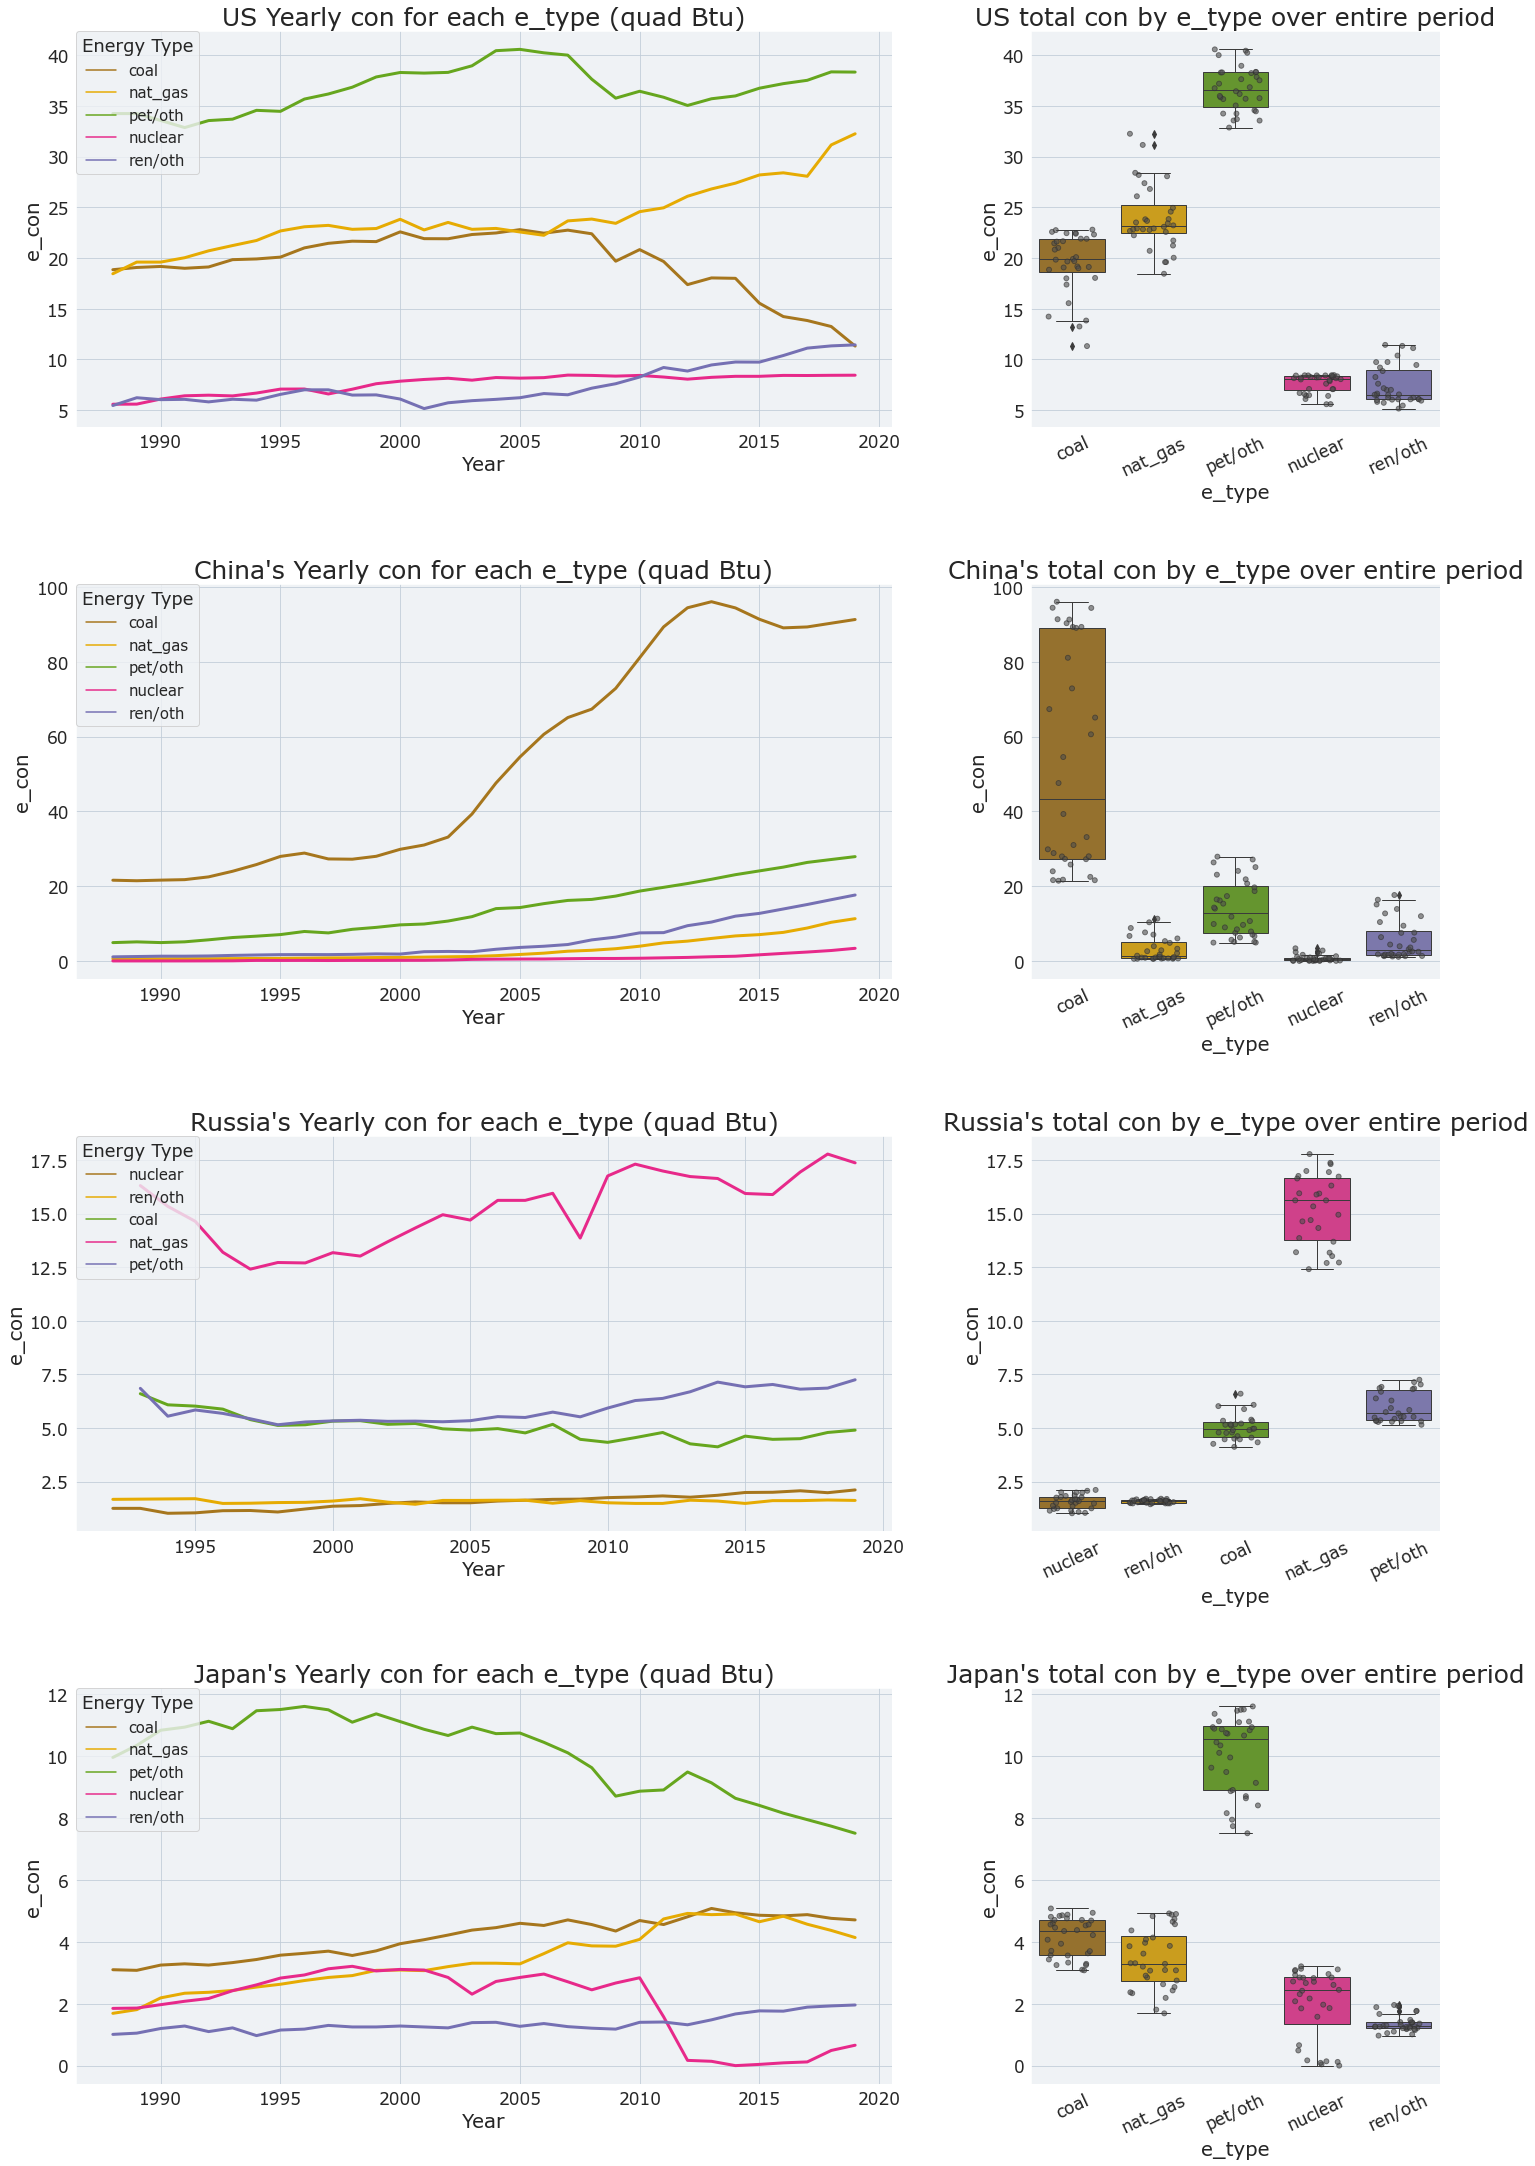

In [53]:
fig, ax = plt.subplots(4, 2, figsize = (20, 30), # constrained_layout = True,
                               gridspec_kw = {'width_ratios': [6, 3], 
                                                'height_ratios': [4, 4, 4, 4]})

ax_flat = ax.flatten()


# 1st graph
sns.lineplot(ax=ax_flat[0], data=df[df['Country']=='United States'][df['e_type']!='all'],
            x='Year',
            y='e_con',
            hue='e_type',
            lw=3,
            ).set_title('US Yearly con for each e_type (quad Btu)')

ax_flat[0].legend(fontsize=15, title='Energy Type', title_fontsize=18, loc='upper left', borderaxespad=0)
    

# 2nd graph
sns.stripplot(ax=ax_flat[1], data=df[df['Country']=='United States'][df['e_type']!='all'],
            x='e_type', y='e_con', jitter=.3, linewidth=0.9, size=5, alpha=.6, color=".3"
            )

sns.boxplot(ax=ax_flat[1], data=df[df['Country']=='United States'][df['e_type']!='all'],
            x='e_type', y='e_con', linewidth=1
            ).set_title('US total con by e_type over entire period')
ax_flat[1].tick_params(axis='x', rotation=25)


# 3rd graph
sns.lineplot(ax=ax_flat[2], data=df[df['Country']=='China'][df['e_type']!='all'],
            x='Year',
            y='e_con',
            hue='e_type',
            lw=3,
            ).set_title('China\'s Yearly con for each e_type (quad Btu)')

ax_flat[2].legend(fontsize=15, title='Energy Type', title_fontsize=18, loc='upper left', borderaxespad=0)


# 4th graph
sns.stripplot(ax=ax_flat[3], data=df[df['Country']=='China'][df['e_type']!='all'],
            x='e_type', y='e_con', jitter=.3, linewidth=0.9, size=5, alpha=.6, color=".3"
            )

sns.boxplot(ax=ax_flat[3], data=df[df['Country']=='China'][df['e_type']!='all'],
            x='e_type', y='e_con', linewidth=1
            ).set_title('China\'s total con by e_type over entire period')
ax_flat[3].tick_params(axis='x', rotation=25)


# 5th graph
sns.lineplot(ax=ax_flat[4], data=df[df['Country']=='Russia'][df['e_type']!='all'],
            x='Year',
            y='e_con',
            hue='e_type',
            lw=3,
            ).set_title('Russia\'s Yearly con for each e_type (quad Btu)')

ax_flat[4].legend(fontsize=15, title='Energy Type', title_fontsize=18, loc='upper left', borderaxespad=0)


# 6th graph
sns.stripplot(ax=ax_flat[5], data=df[df['Country']=='Russia'][df['e_type']!='all'],
            x='e_type', y='e_con', jitter=.3, linewidth=0.9, size=5, alpha=.6, color=".3"
            )

sns.boxplot(ax=ax_flat[5], data=df[df['Country']=='Russia'][df['e_type']!='all'],
            x='e_type', y='e_con', linewidth=1
            ).set_title('Russia\'s total con by e_type over entire period')
ax_flat[5].tick_params(axis='x', rotation=25)


# 7th graph
sns.lineplot(ax=ax_flat[6], data=df[df['Country']=='Japan'][df['e_type']!='all'],
            x='Year',
            y='e_con',
            hue='e_type',
            lw=3,
            ).set_title('Japan\'s Yearly con for each e_type (quad Btu)')

ax_flat[6].legend(fontsize=15, title='Energy Type', title_fontsize=18, loc='upper left', borderaxespad=0)


# 8th graph
sns.stripplot(ax=ax_flat[7], data=df[df['Country']=='Japan'][df['e_type']!='all'],
            x='e_type', y='e_con', jitter=.3, linewidth=0.9, size=5, alpha=.6, color=".3"
            )

sns.boxplot(ax=ax_flat[7], data=df[df['Country']=='Japan'][df['e_type']!='all'],
            x='e_type', y='e_con', linewidth=1
            ).set_title('Japan\'s total con by e_type over entire period')
ax_flat[7].tick_params(axis='x', rotation=25)
    
    
plt.tight_layout(pad=0.2, w_pad=3, h_pad=3)
plt.show()

Things to Notice:
 * United States:
   * Petroleum/other liquids and Natural Gas are the most consumed energy types
   * Starting around 2005 to 2019, Coal consumption has dropped by nearly 50%, and in 2019 it is now around the same consumption rate as Renewables
 * China:
   * Coal is the most consumed energy type
   * All other energy tppes have been slowly rising in consumption over the time period
 * Russia:
   * Natural Gas is the most consumed energy type
   * Nuclear and Renewables have stayed around the same level throughout the entire time period
 * Japan:
   * Petroleum/other liquids are the most used energy types
   * Nuclear consumption dropped nearly to 0 after 2011, which happens to be when the Fukushima nuclear disaster occured, but it seems to have picked up consumption again later around 2017.

**Total Consumed of each energy type for top 4 consumers over entire period**

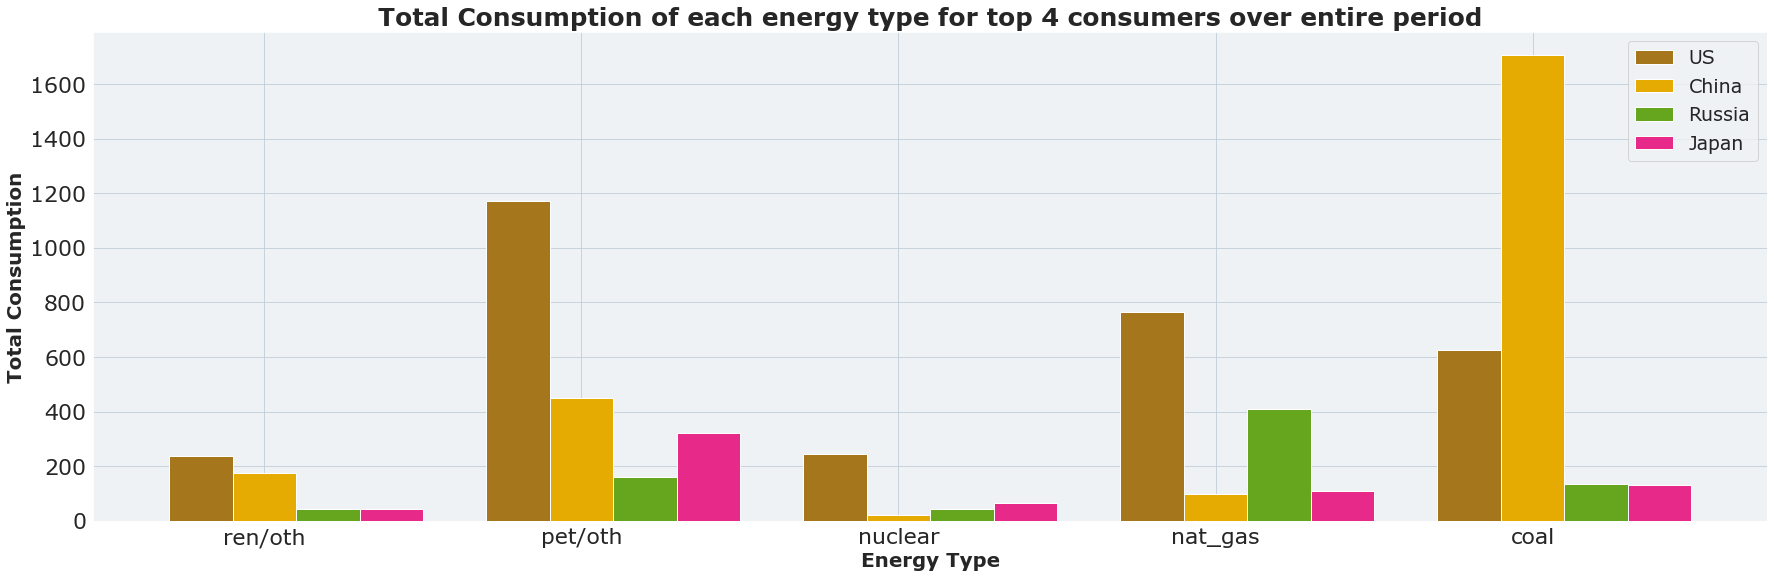

In [55]:
# e_type columns
types = ['coal', 'nat_gas', 'pet/oth', 'nuclear', 'ren/oth']

# Top 4 consumers
top_four = top_con['Country'].head(4).to_list()

list = []
for type in types:
    
    for country in top_four:
        amount = df[df['Country']==country][df['e_type']==type]['e_con'].sum()
        list.extend([[country, type, amount]])
    
# Temporary dataframe
temp = pd.DataFrame(list, columns=['Country', 'e_type', 'sum_con']).sort_values(by=['e_type', 'sum_con'], ascending=False).reset_index(drop=True)

# set width of bars
barWidth = 0.20

# set heights of bars
us_bar = temp[temp['Country']=='United States']['sum_con'].to_list()
ch_bar = temp[temp['Country']=='China']['sum_con'].to_list()
ru_bar = temp[temp['Country']=='Russia']['sum_con'].to_list()
sa_bar = temp[temp['Country']=='Japan']['sum_con'].to_list()

    
# Set position of bar on X axis
r_us = np.arange(len(types))
r_ch = [x + barWidth for x in r_us]
r_ru = [x + barWidth for x in r_ch]
r_jp = [x + barWidth for x in r_ru]

# Make the plot
plt.figure(figsize = (30, 9))
plt.bar(r_us, us_bar, width=barWidth, edgecolor='white', label='US')
plt.bar(r_ch, ch_bar, width=barWidth, edgecolor='white', label='China')
plt.bar(r_ru, ru_bar, width=barWidth, edgecolor='white', label='Russia')
plt.bar(r_jp, sa_bar, width=barWidth, edgecolor='white', label='Japan')

plt.title('Total Consumption of each energy type for top 4 consumers over entire period', fontweight='bold')
plt.ylabel('Total Consumption', fontweight='bold')
plt.yticks(fontsize=22)
plt.xlabel('Energy Type', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(us_bar))], ['ren/oth', 'pet/oth', 'nuclear', 'nat_gas', 'coal'], fontsize=22)
plt.legend()
plt.show()

**Who consumes the most clean/dirty energy worldwide?**

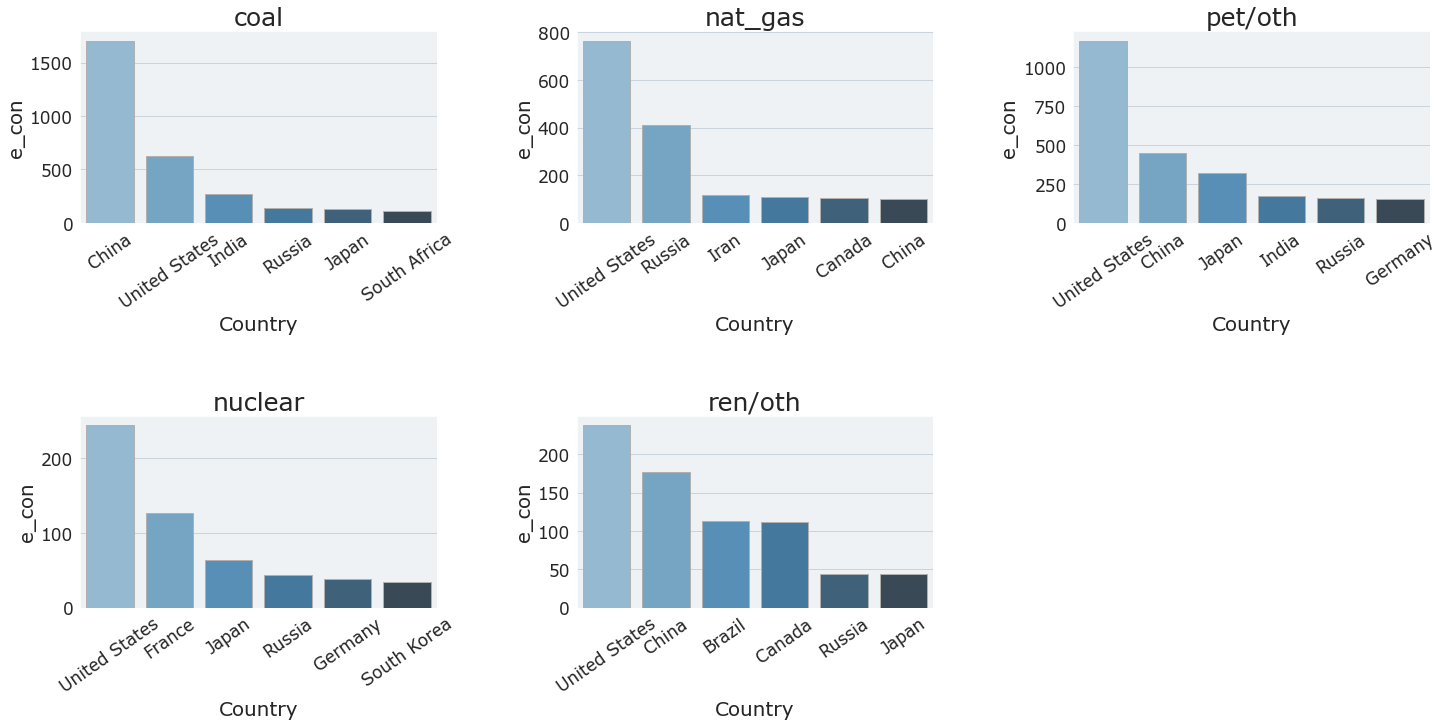

In [56]:
# Top 4 Dirty energy consumers worldwide 
fig, ax = plt.subplots(2, 3, figsize = (20, 10))
    
    
# e_type columns
types = ['coal', 'nat_gas', 'pet/oth', 'nuclear', 'ren/oth']

# excluding world
con3 = df[df['Country']!='World'].reset_index()   
    

for idx, (type, axes) in enumerate(zip(types, ax.flatten())):
    
    dirty = con3[con3['e_type']==type].groupby(['Country'])['e_con'].sum().reset_index().sort_values(by='e_con', ascending=False)
    
    sns.barplot(ax=axes, data=dirty.head(6), x='Country', y='e_con', palette="Blues_d")
    
    # Title
    axes.set_title(f'{type}')
    
     # Rotating X axis
    for tick in axes.get_xticklabels():
        tick.set_rotation(35)
    

### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    
plt.tight_layout(pad=0.2, w_pad=3, h_pad=3)
plt.show()



Over the entire time period the United States has been the dominant consumer of clean energy.

**Who consumed the most clean energy in the past 10 years?**

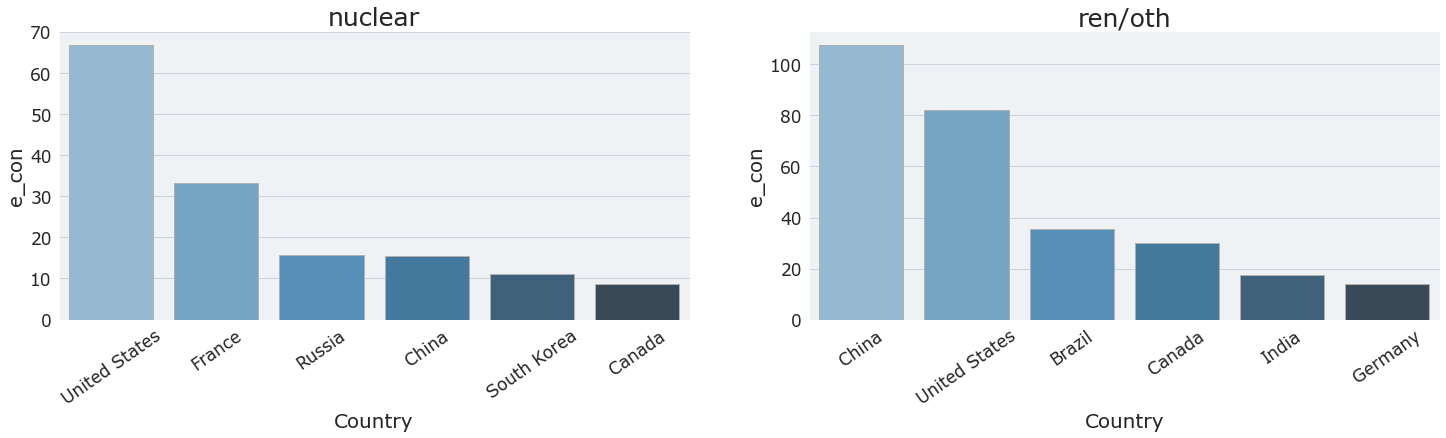

In [57]:
# Top 4 Dirty energy consumers worldwide 
fig, ax = plt.subplots(1, 2, figsize = (20, 6))
    
    
# e_type columns
dirty_types = ['nuclear', 'ren/oth']

# excluding world
con4 = df[df['Country']!='World'][df['Year']>=2012].reset_index()   
    

for idx, (type, axes) in enumerate(zip(dirty_types, ax.flatten())):
    
    dirty = con4[con4['e_type']==type].groupby(['Country'])['e_con'].sum().reset_index().sort_values(by='e_con', ascending=False)
    
    sns.barplot(ax=axes, data=dirty.head(6), x='Country', y='e_con', palette="Blues_d")
    
    # Title
    axes.set_title(f'{type}')
    
     # Rotating X axis
    for tick in axes.get_xticklabels():
        tick.set_rotation(35)
    

### Removing empty figures
else:
    [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    
plt.tight_layout(pad=0.2, w_pad=3, h_pad=3)
plt.show()


The United States is still the dominant consumer of nuclear energy, but as for renewables/other, China seems to have increased its consumption and surpassed The United States in becoming the dominant consumer of renewables.

**CO2 Emission, Energy Intensity by GDP and Energy Intensity per Capita of top 4 consumers** 

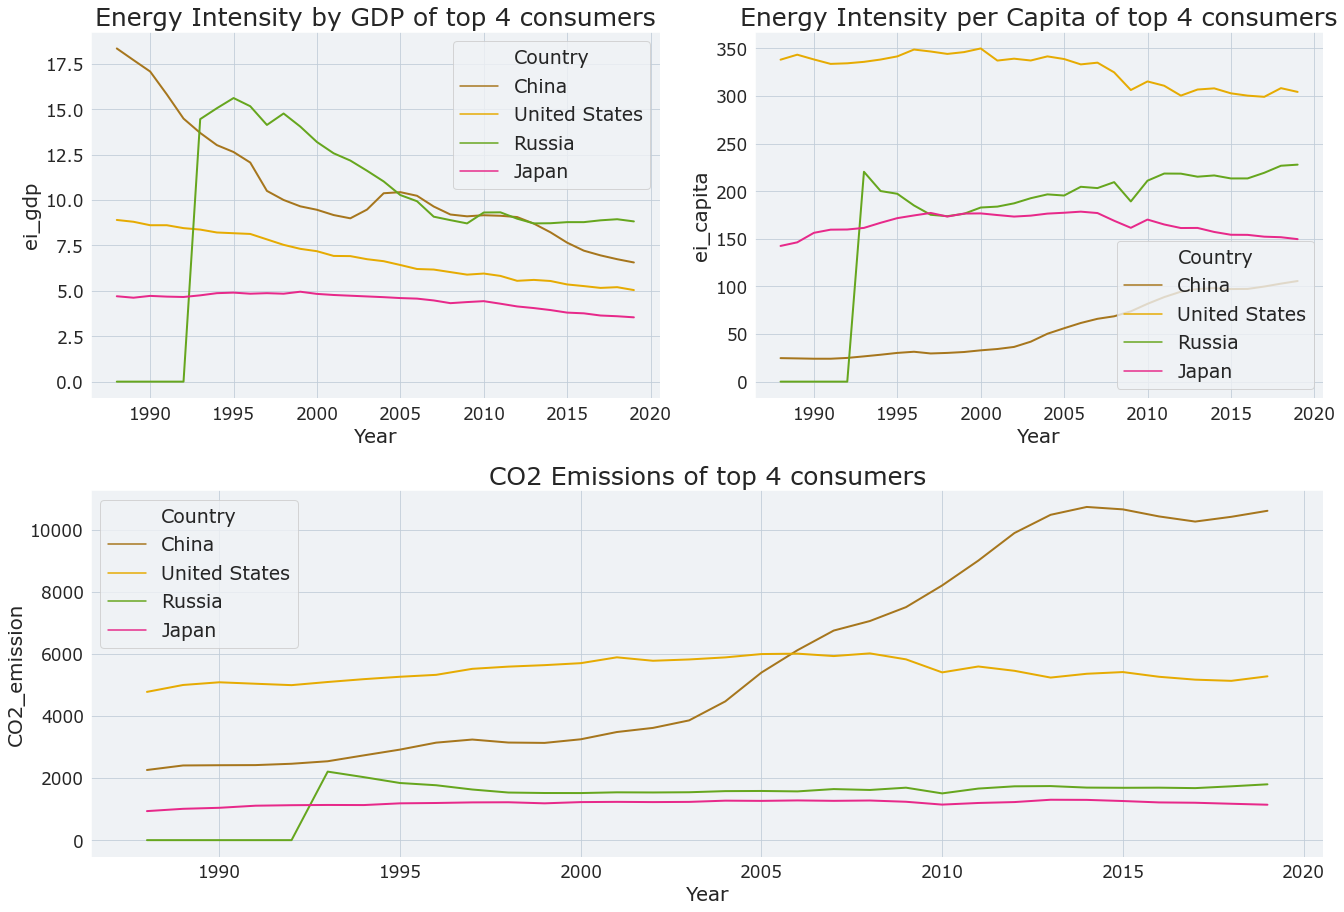

In [58]:
con5 = df[df['Country']!='World'][df['e_type']=='all'].reset_index()

# Years
years = con5['Year'].unique()

# List of top 6 countries with largest population in 2019 
top_four = ['China', 'United States', 'Russia', 'Japan']

# For ei_gdp
list = []
for year in years:
    for cont in top_four:
        amount = con5[con5['Country']==cont][con5['Year']==year]['ei_gdp'].sum()
        list.extend([[cont, year, amount]])

    # Temporary dataframe
temp_con5 = pd.DataFrame(list, columns=['Country', 'Year', 'ei_gdp'])


# For ei_capita
list2 = []
for year in years:
    for cont in top_four:
        amount = con5[con5['Country']==cont][con5['Year']==year]['ei_capita'].sum()
        list2.extend([[cont, year, amount]])

    # Temporary dataframe
temp_con52 = pd.DataFrame(list2, columns=['Country', 'Year', 'ei_capita'])


# For C02_emission
list3 = []
for year in years:
    for cont in top_four:
        amount = con5[con5['Country']==cont][con5['Year']==year]['CO2_emission'].sum()
        list3.extend([[cont, year, amount]])

    # Temporary dataframe
temp_con53 = pd.DataFrame(list3, columns=['Country', 'Year', 'CO2_emission'])

# Graphing
plt.figure(figsize=(19,13))

    ### 1st graph
plt.subplot(221)
sns.lineplot(data=temp_con5,
            x='Year', y='ei_gdp', hue='Country', lw=2
            ).set_title('Energy Intensity by GDP of top 4 consumers')
#ax1.legend(fontsize=15, title='Country', title_fontsize=20, loc='upper left', borderaxespad=0)

    ### 2nd graph
plt.subplot(222)
sns.lineplot(data=temp_con52,
            x='Year', y='ei_capita', hue='Country', lw=2
            ).set_title('Energy Intensity per Capita of top 4 consumers')
#ax_2.legend(fontsize=15, title='Country', title_fontsize=20, loc='upper left', borderaxespad=0)

    ### 3rd graph
plt.subplot(212)
sns.lineplot(data=temp_con53,
            x='Year', y='CO2_emission', hue='Country', lw=2
            ).set_title('CO2 Emissions of top 4 consumers')
#ax3.legend(fontsize=15, title='Country', title_fontsize=20, loc='upper left', borderaxespad=0)


plt.tight_layout(pad = 1)
plt.show()

<a id=4></a>

**Conclusion on Energy Consumption**
 * Energy consumption has a positive relationshiop with CO2 emission
 * Most consumed energy types go in the order of Petroleum/other, Coal, Natural Gas, Renwables/other, and lastly Nuclear
 * Energy consumption has been increasing by roughly 1.81% yearlly, and has overall increased by 73.93% in this time period
 * Top Consumers are The United States, China, Russia, Japan, and India to name a few
 * Over the entire time period, The United States has consumed the most clean energy
 * In the past ten years The United States is still the dominant consumer of Nuclear, but China has overtaken The United States place in becoming the dominant consumer of Renewable/other energy